<a href="https://colab.research.google.com/github/SamyFanambinantsoa/Machine_Learning_M2/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Chargement du CSV, vérification des valeurs nulles et supression des features non-informatives ou redondantes




In [34]:
import kagglehub as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold

path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)
data = pd.read_csv(path + "/Mall_Customers.csv")
#print(data.isnull().sum())
data = data.drop('CustomerID', axis= 1)


Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


#Standardisation des variables quantitatives



In [35]:
#Standardisation des variables quantitatives
quant_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[quant_cols])

#Affichage dy boxplot et du pairplot par rapport au genre et du heatplot pour voir la correlation des données entre eux


     Gender  Age  Revenu annuel  Score dépenses
0      Male   19             15              39
1      Male   21             15              81
2    Female   20             16               6
3    Female   23             16              77
4    Female   31             17              40
..      ...  ...            ...             ...
195  Female   35            120              79
196  Female   45            126              28
197    Male   32            126              74
198    Male   32            137              18
199    Male   30            137              83

[200 rows x 4 columns]


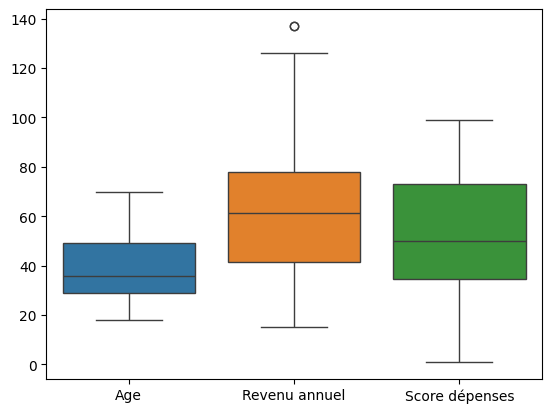

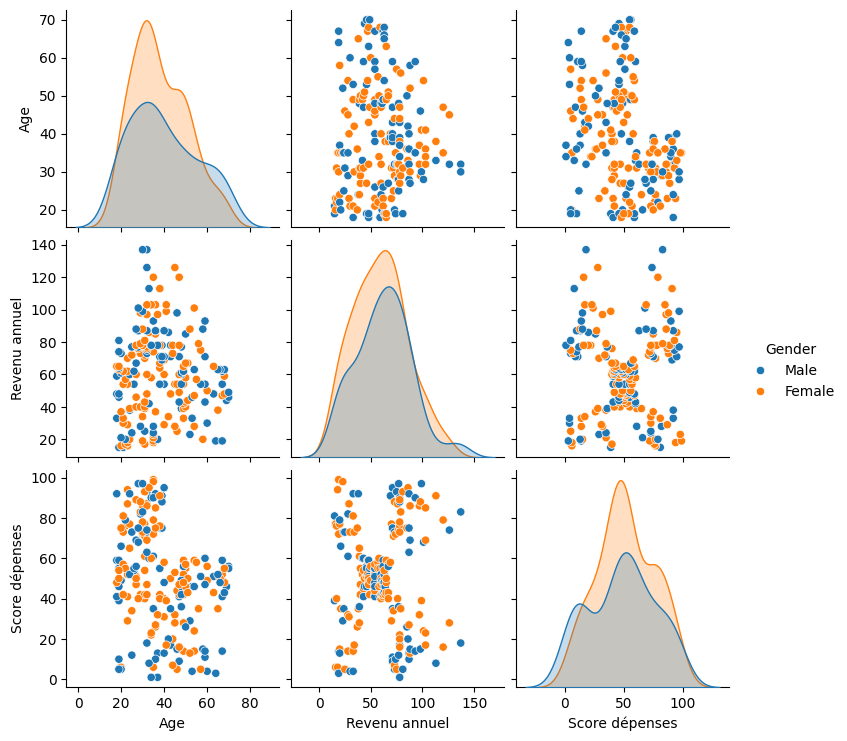

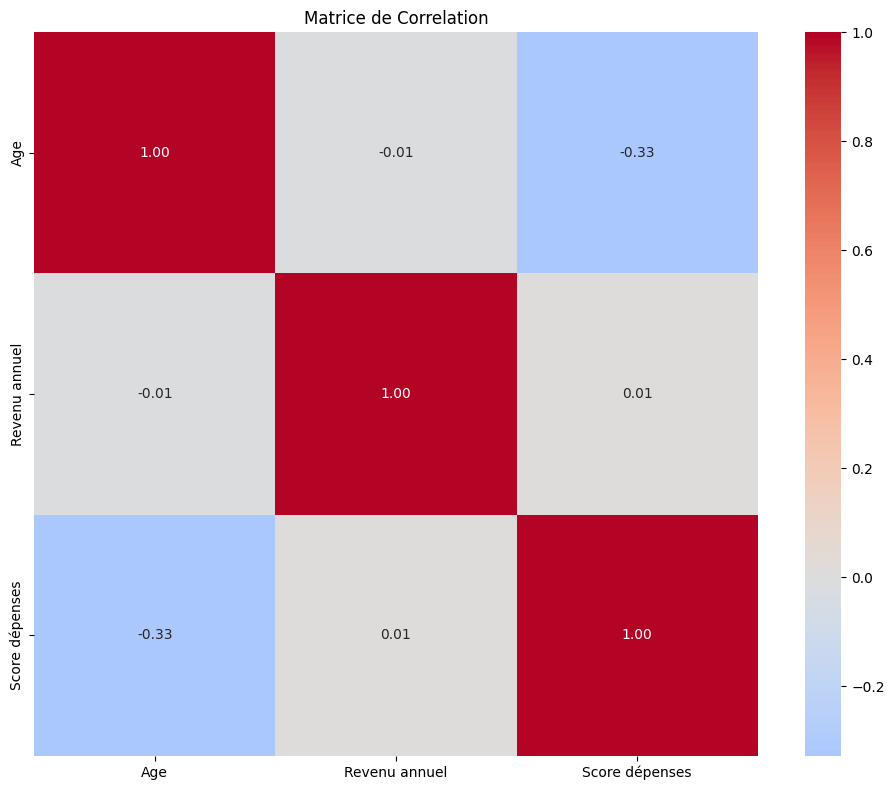

In [36]:
data = data.rename(columns={
    "Age": "Age",
    "Annual Income (k$)": "Revenu annuel",
    "Spending Score (1-100)": "Score dépenses"
})
sns.boxplot(data)
print(data)
sns.pairplot(data, hue='Gender')

data2 = data.select_dtypes(include=[np.number])
cor_matrix = data2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,)
plt.title('Matrice de Correlation')
plt.tight_layout()
plt.show()

# Réduction de dimension avec PCA en dimension 2 et Clustering K-means


In [37]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
k = 4
kmeans = KMeans(n_clusters=k, random_state=3)
clusters = kmeans.fit_predict(data_scaled)
data["Cluster"] = clusters


# Affichage du PCA avec clustering


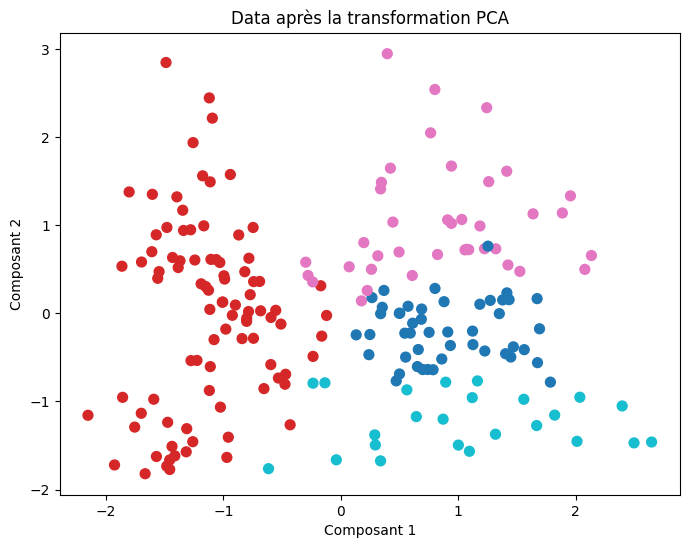

0.7757454566976747


In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='tab10', s=50, alpha=1)
plt.grid(True)

plt.title("Data après la transformation PCA")
plt.xlabel("Composant 1")
plt.ylabel("Composant 2")
plt.grid()
plt.show()

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns[:-2])
centroids_original = pd.DataFrame(
    scaler.inverse_transform(centroids),
    columns=data.columns[:-2]
)
centroids_original["Cluster"] = range(k)
centroids_original = centroids_original.drop('Gender', axis= 1)
print(sum(pca.explained_variance_ratio_))



## En analysant les centroides, on obtiens les valeurs moyennes de chaque profile :

Cluster 0
*   52.5 ans de moyenne
*   59.4 de revenu annuel
*   31.4 de score de dépenses

Cluster 1
*   48.1 ans de moyenne
*   58.8 de revenu annuel
*   34.7 de score de dépenses

Cluster 2
*   28.4 ans de moyenne
*   59.6 de revenu annuel
*   67.6 de score de dépenses

Cluster 3
*   27.6 ans de moyenne
*   64.9 de revenu annuel
*   64.82 de score de dépenses

Si on regarde le *'explained_variance_ratio'* de notre projet, on peut constater que la valeur est faible ( au alentour de 0.6) ce qui veut dire que avec ces données, on a une perte de donnée qui est possiblement considérable lors de l'application du PCA

